# Correlation Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rcParams.update({
    'font.size': 16,
    'axes.labelsize': 16,
    'xtick.labelsize': 16,
    'ytick.labelsize': 16,
    'axes.linewidth': 1.2,
    'xtick.major.width': 1.2,
    'ytick.major.width': 1.2,
    'savefig.format': 'png',
    'savefig.bbox': 'tight',
    'font.family': 'Times New Roman',
    'text.usetex': False
})

In [3]:
df = pd.read_csv('../dataset/data.csv')
df.head()

,DATE,T,SP,SR,RH,WU,WV,TSM,CHL,CDOM,CDEC,EV
0,6/24/2016,26.248143,96821.02653,31562901.28,40.56,0.194397,0.860564,-0.710855,-1.107892,-1.451557,6.452353,8.420540
1,7/14/2016,27.984237,96651.16619,31276649.52,22.75,-0.011315,0.319810,-0.506057,-0.952389,-1.046996,8.165377,8.070396
2,8/3/2016,27.073733,96595.32039,29337726.72,15.12,-0.050064,0.459498,0.168353,-0.269065,0.236308,8.373570,7.883678
3,8/23/2016,24.419640,96680.79519,25496985.60,23.69,-0.560787,1.642996,0.755064,0.640315,1.284765,5.978892,6.562248
4,9/12/2016,20.526815,96353.97802,22353904.56,42.12,-0.931960,2.114761,0.931730,0.836024,1.706997,6.797793,5.121693


In [4]:
# Water Quality Data
wq = df.drop(["DATE", "SP", "SR", "RH", "WU", "WV", "CDEC"], axis=1)
wq.head()

,T,TSM,CHL,CDOM,EV
0,26.248143,-0.710855,-1.107892,-1.451557,8.420540
1,27.984237,-0.506057,-0.952389,-1.046996,8.070396
2,27.073733,0.168353,-0.269065,0.236308,7.883678
3,24.419640,0.755064,0.640315,1.284765,6.562248
4,20.526815,0.931730,0.836024,1.706997,5.121693


In [5]:
# Meteorological Data
mg = df.drop(["DATE", "T", "CHL", "CDOM", "CDEC"], axis=1)
mg.head()

,SP,SR,RH,WU,WV,TSM,EV
0,96821.02653,31562901.28,40.56,0.194397,0.860564,-0.710855,8.420540
1,96651.16619,31276649.52,22.75,-0.011315,0.319810,-0.506057,8.070396
2,96595.32039,29337726.72,15.12,-0.050064,0.459498,0.168353,7.883678
3,96680.79519,25496985.60,23.69,-0.560787,1.642996,0.755064,6.562248
4,96353.97802,22353904.56,42.12,-0.931960,2.114761,0.931730,5.121693


In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def correlation(data, name="dataset"):
    corr = data.corr()

    mask = np.triu(np.ones_like(corr, dtype=bool))
    np.fill_diagonal(mask, False)

    plt.figure(figsize=(8, 6), dpi=600)
    heatmap = sns.heatmap(
        corr, mask=mask, vmin=-1, vmax=1,
        annot=True, fmt=".2f",
        cmap='coolwarm',
        annot_kws={"size": 16, "weight": "bold"},
        cbar_kws={"shrink": .8, "ticks": np.linspace(-1, 1, 5)}
    )
    colorbar = heatmap.collections[0].colorbar
    colorbar.set_label('Correlation Coefficient', fontsize=20)
    heatmap.figure.axes[-1].yaxis.label.set_size(18)
    heatmap.figure.axes[-1].tick_params(labelsize=18)

    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18, rotation=0)
    heatmap.tick_params(axis='x', pad=10)
    heatmap.tick_params(axis='y', pad=10)

    plt.tight_layout()
    plt.savefig(f"./../plots/correlation-{name}.png", dpi=600, bbox_inches='tight')
    plt.show()

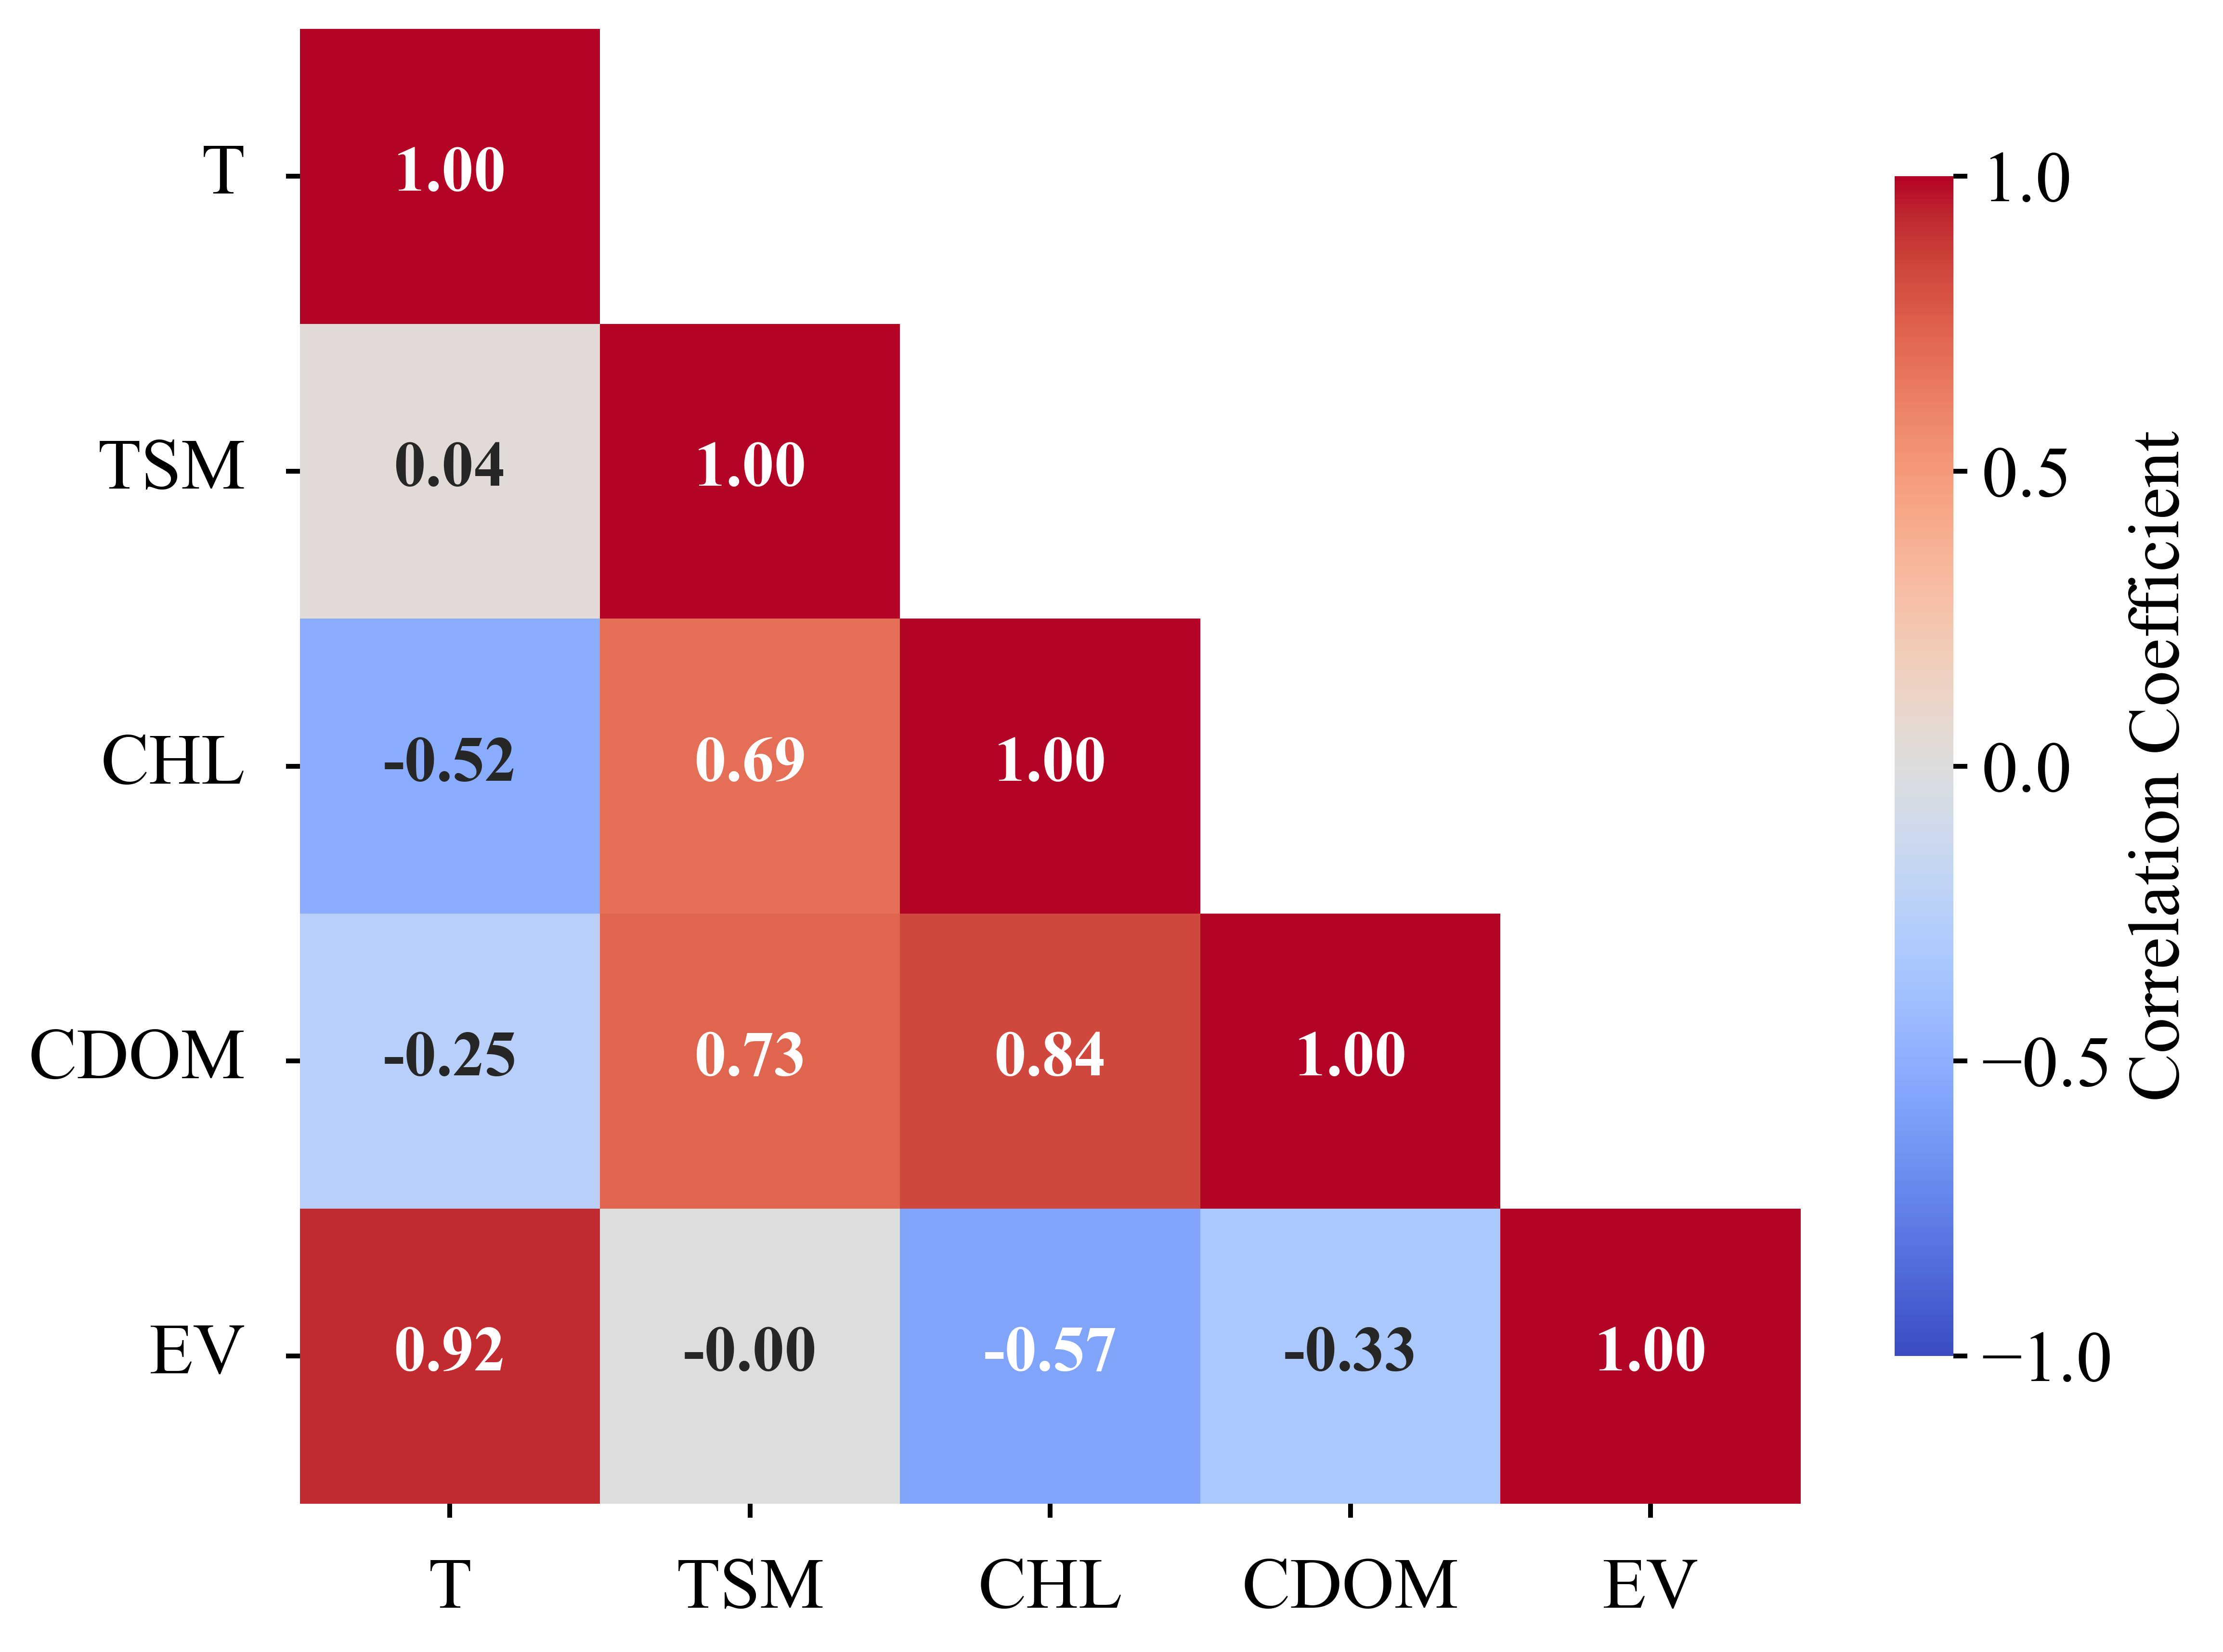

In [7]:
correlation(wq, "waterquality")

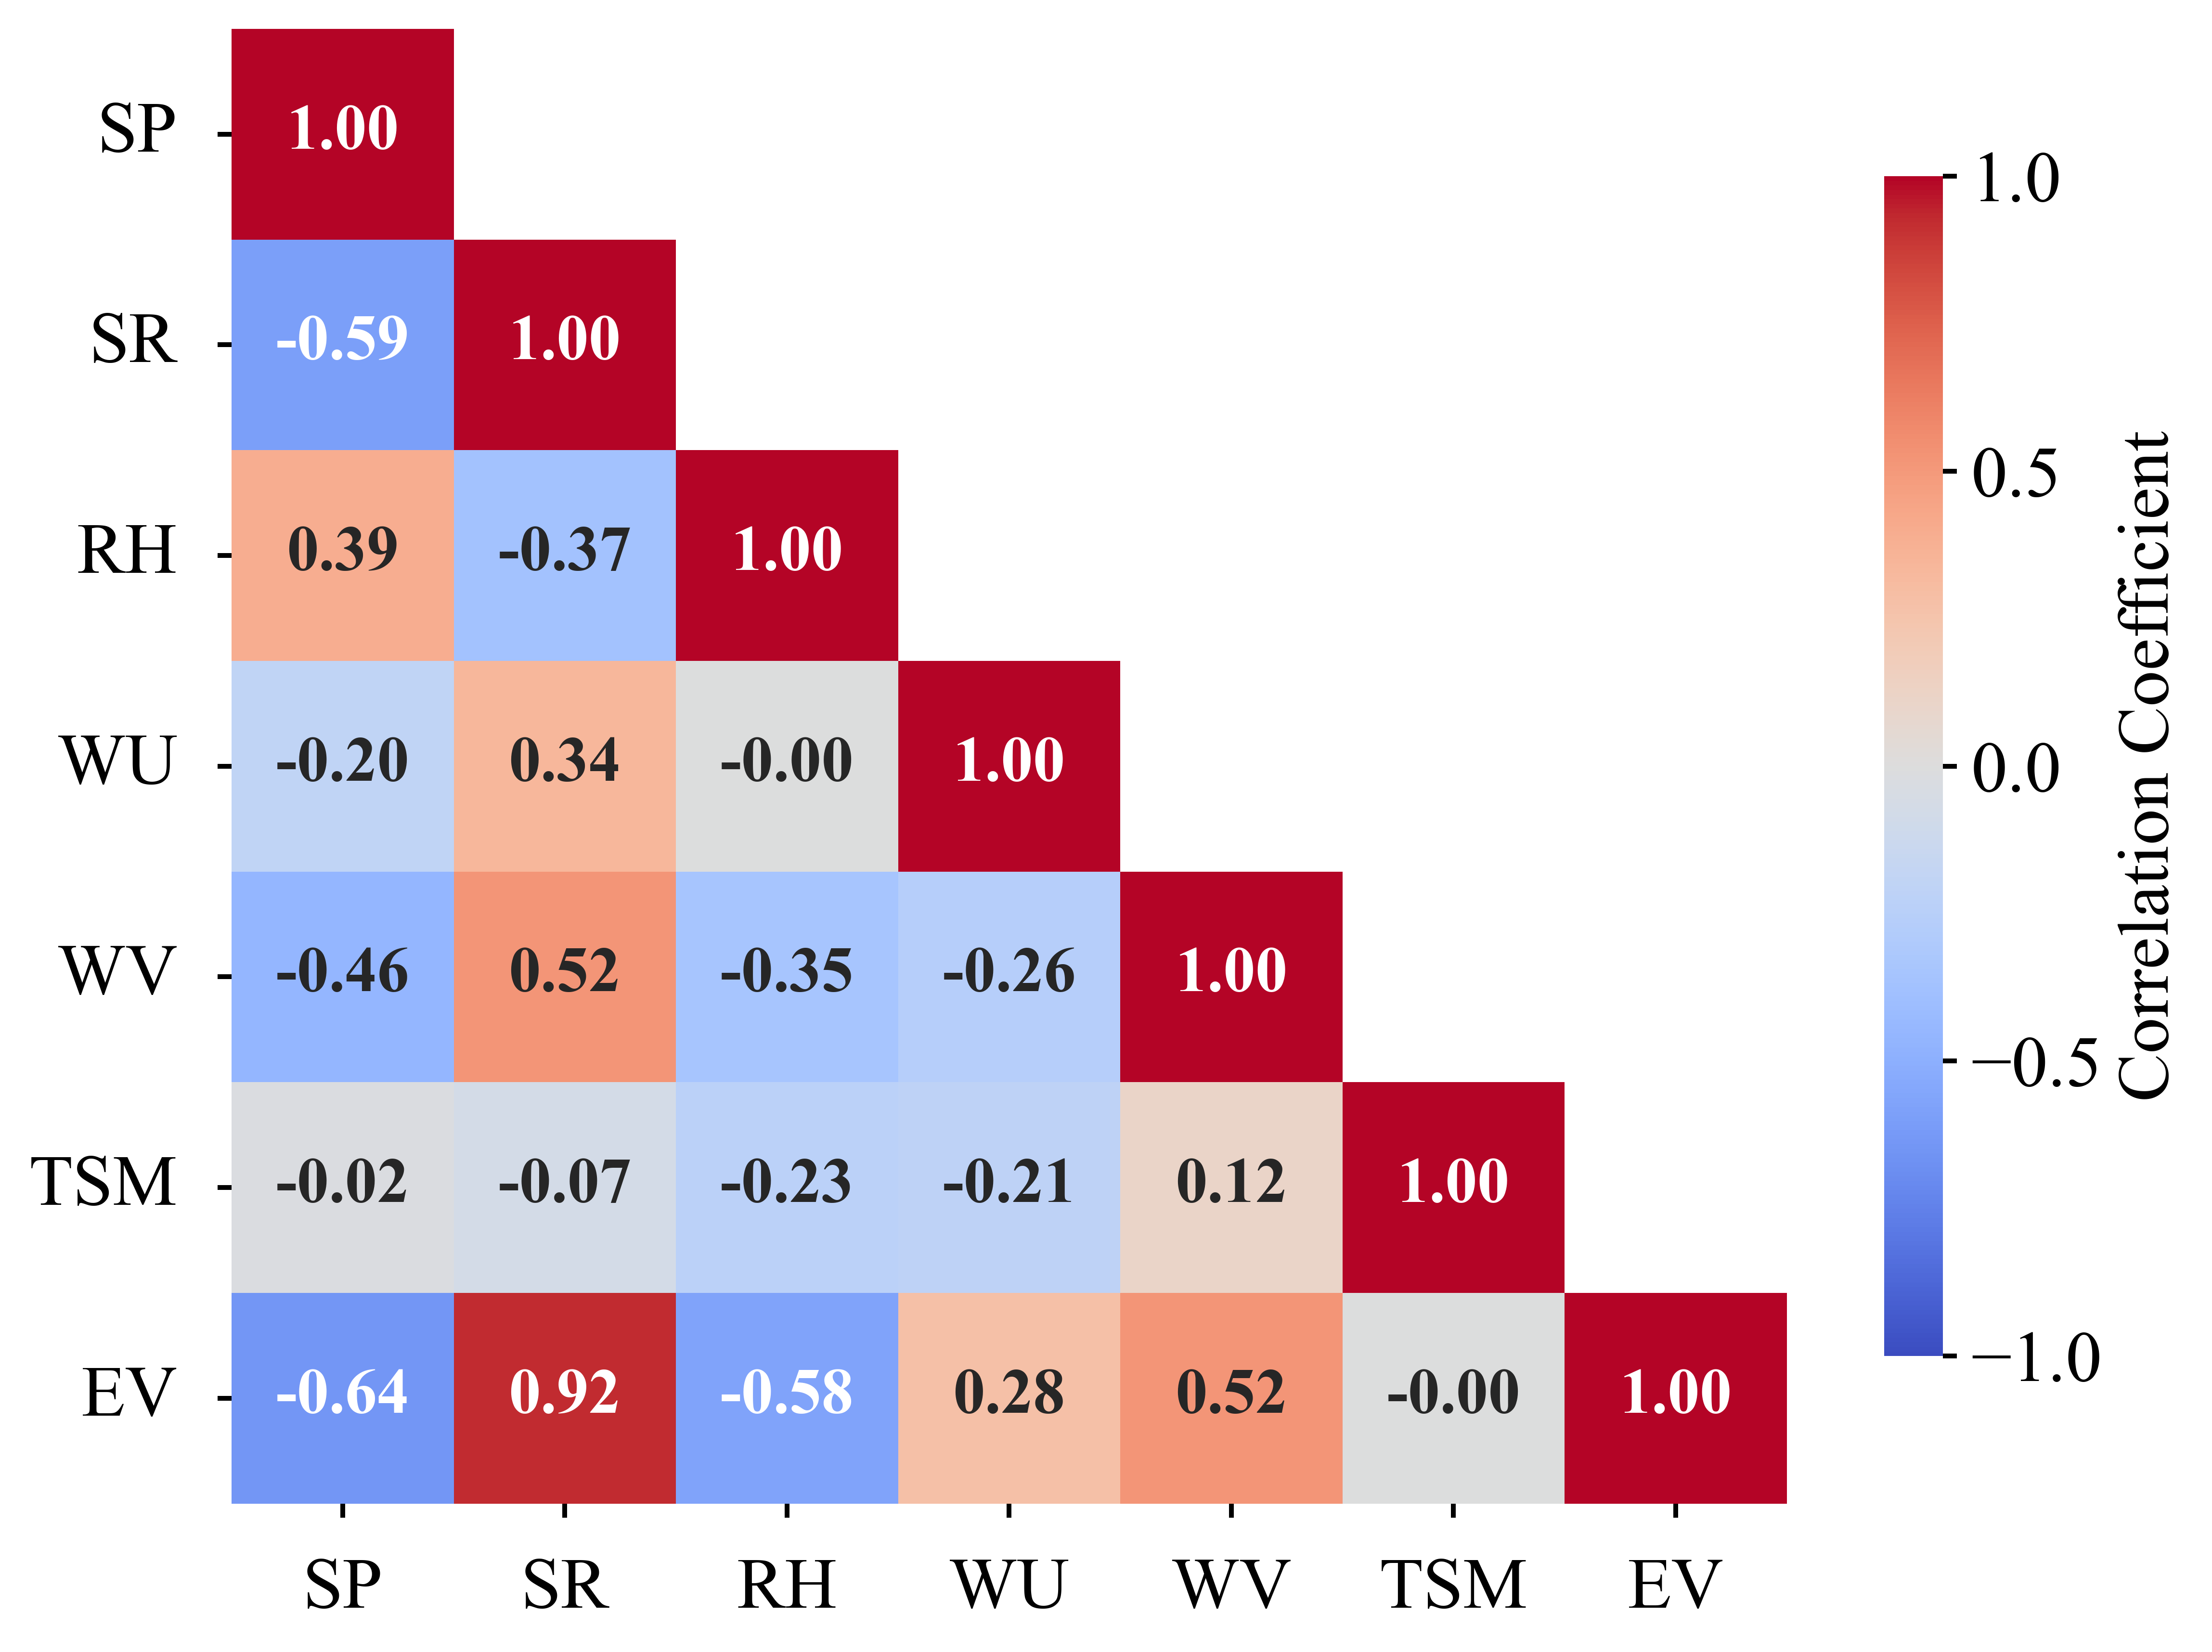

In [8]:
correlation(mg, "meteorological")